In [1]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps.zip

--2023-06-07 01:06:43--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  19.8MB/s    in 12s     

2023-06-07 01:06:55 (16.3 MB/s) - ‘rps.zip’ saved [200682221/200682221]



In [4]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/rps-test-set.zip

--2023-06-07 01:08:39--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  11.7MB/s    in 2.4s    

2023-06-07 01:08:41 (11.7 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [5]:
import os
import zipfile

local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()


In [7]:
rock_dir = os.path.join('rps/rock')
paper_dir = os.path.join('rps/paper')
scissors_dir = os.path.join('rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-058.png', 'rock02-033.png', 'rock07-k03-039.png', 'rock06ck02-055.png', 'rock04-071.png', 'rock02-087.png', 'rock06ck02-065.png', 'rock02-004.png', 'rock03-093.png', 'rock02-006.png']
['paper02-035.png', 'paper05-074.png', 'paper03-030.png', 'paper06-058.png', 'paper03-054.png', 'paper04-041.png', 'paper01-109.png', 'paper06-107.png', 'paper02-114.png', 'paper07-044.png']
['testscissors02-114.png', 'scissors01-000.png', 'testscissors01-041.png', 'testscissors03-051.png', 'testscissors03-106.png', 'scissors03-037.png', 'testscissors02-033.png', 'testscissors02-024.png', 'scissors03-034.png', 'scissors04-115.png']


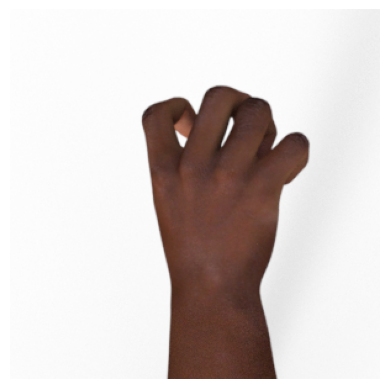

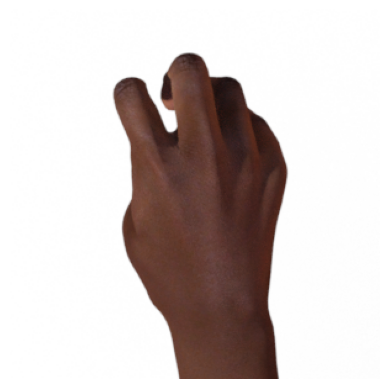

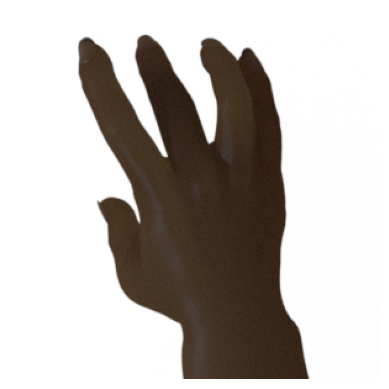

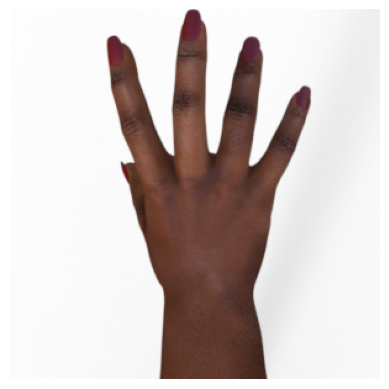

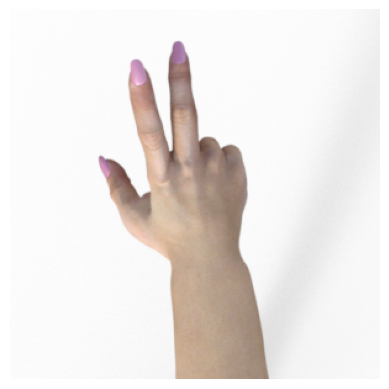

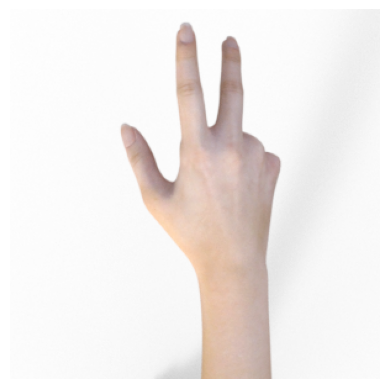

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [9]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")


2023-06-07 01:11:10.511971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-07 01:11:10.512000: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                       

2023-06-07 01:11:14.130359: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-07 01:11:14.130389: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-07 01:11:14.130414: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-5d9270): /proc/driver/nvidia/version does not exist
2023-06-07 01:11:14.130650: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25


2023-06-07 01:11:15.040807: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34020000 exceeds 10% of free system memory.
2023-06-07 01:11:16.633815: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 34020000 exceeds 10% of free system memory.
2023-06-07 01:11:16.660388: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 706535424 exceeds 10% of free system memory.
2023-06-07 01:11:17.225092: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 176633856 exceeds 10% of free system memory.
2023-06-07 01:11:17.358279: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 167215104 exceeds 10% of free system memory.


 2/20 [==>...........................] - ETA: 1:12 - loss: 6.3308 - accuracy: 0.3532